In [1]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
from random_optimization_python import rhc, sa, ga, mimic

### Four peaks problem

Definition of the fitness function for the Four Peaks problem

In [11]:
s = '11111000000000000000'
four_peaks_ff(s)

35

In [2]:
def head(bit, x):
    m = re.search('(^{}+)'.format(bit), x)
    if m: 
        return len(m.group(0))
    else: 
        return 0

def tail(bit, x):
    m = re.search('({}+$)'.format(bit), x)
    if m: 
        return len(m.group(0))
    else: 
        return 0

def r(x, t):
    if tail(0, x) > t and head(1, x) > t:
        return len(x)
    else: 
        return 0

def four_peaks_ff(x):
    t = len(x) / 5
    x = np.array(x)
    if type(x).__module__ == np.__name__:
        x = [str(x_1) for x_1 in x.tolist()]
        x = "".join(x)
    return max(tail(0, x), head(1, x)) + r(x, t)

Illustration of what the function does to a range of bitstrings from 0 - 100

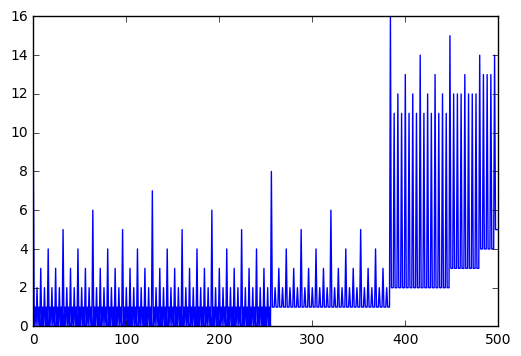

In [13]:
#x = [re.sub('0b', '', bin(x).zfill(22)) for x in range(1048575)]
x = [re.sub('0b', '', bin(x).zfill(11)) for x in range(500)]
y = [four_peaks_ff(x_1) for x_1 in x]

plt.plot(range(500), y)
plt.show()

[35, 63, 39, 29]
[20, 40, 60, 100]
[35.0, 39.0, 37.0, 40.0]
[1, 1, 1, 1]


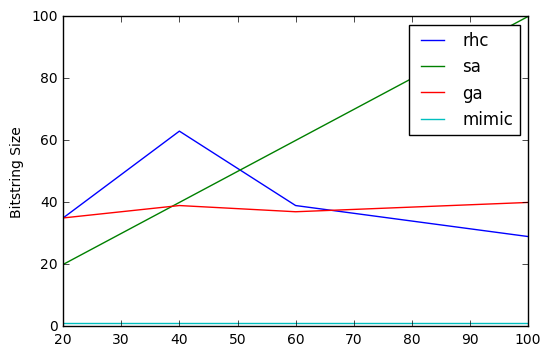

In [12]:
n = [20, 40, 60, 100]

rhc_max = [rhc(n_i, four_peaks_ff, patience=2000)[1] for n_i in n]
print(rhc_max)

sa_max = [sa(n_i, four_peaks_ff)[1] for n_i in n]
print(sa_max)

ga_max = [ga(n_i, four_peaks_ff)[1] for n_i in n]
print(ga_max)

mimic_max = [mimic(n_i, four_peaks_ff)[1] for n_i in n]
print(mimic_max)

plt.plot(n, rhc_max, label='rhc')
plt.plot(n, sa_max, label='sa')
plt.plot(n, ga_max, label='ga')
plt.plot(n, mimic_max, label='mimic')
plt.ylabel('Max Value')
plt.ylabel('Bitstring Size')
plt.legend()
plt.show()

In [14]:
def two_colors_ff(x):
    val = 0
    for i in range(1,len(x)-1):
        if x[i] != x[i-1] and x[i] != x[i+1]:
            val += 1
    return val

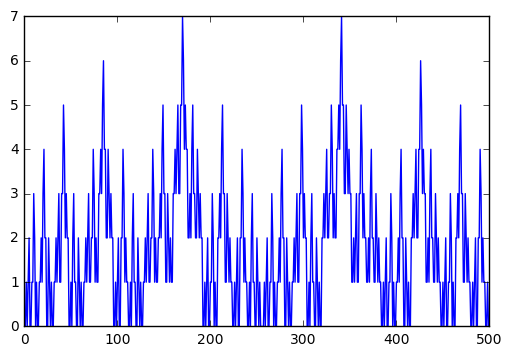

In [16]:
x = [re.sub('0b', '', bin(x).zfill(11)) for x in range(500)]
y = [two_colors_ff(x_1) for x_1 in x]

plt.plot(range(500), y)
plt.show()